In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm


In [388]:
Boombikes=pd.read_csv(r'D:\E-drive\IIITB\Bikesharing provider Boom Bikes\day.csv')

In [389]:
Boombikes.describe()

,season,yr,holiday,weekday,weathersit,temp,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,0.028767,2.997260,1.394521,20.319259,12.763620,4508.006849
std,1.110184,0.500343,0.167266,2.006161,0.544807,7.506729,5.195841,1936.011647
min,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,1.500244,22.000000
25%,2.000000,0.000000,0.000000,1.000000,1.000000,13.811885,9.041650,3169.750000
50%,3.000000,0.500000,0.000000,3.000000,1.000000,20.465826,12.125325,4548.500000
75%,3.000000,1.000000,0.000000,5.000000,2.000000,26.880615,15.625589,5966.000000
max,4.000000,1.000000,1.000000,6.000000,3.000000,35.328347,34.000021,8714.000000


In [390]:
Boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 45.8 KB


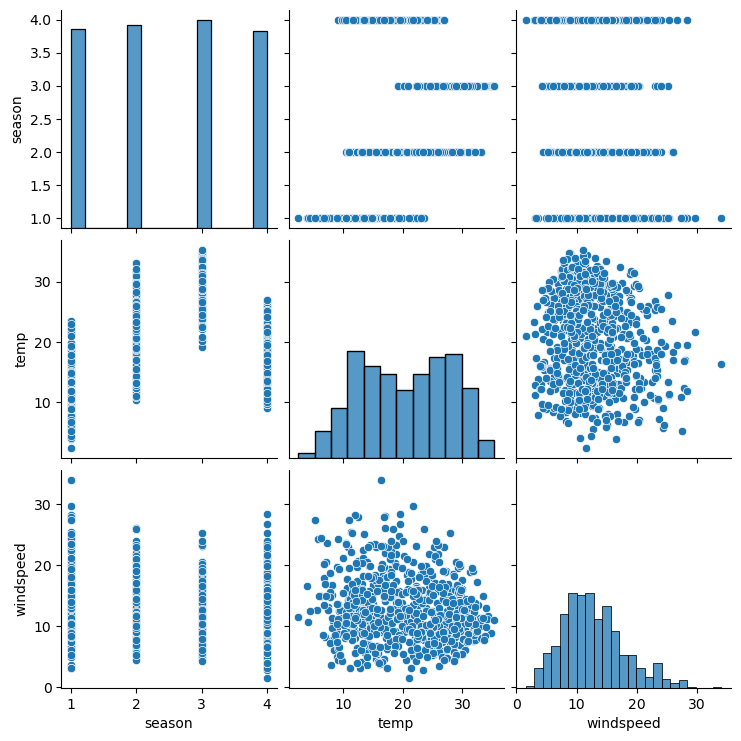

In [391]:
sns.pairplot(Boombikes,vars= ['season','temp','windspeed'])
plt.show()

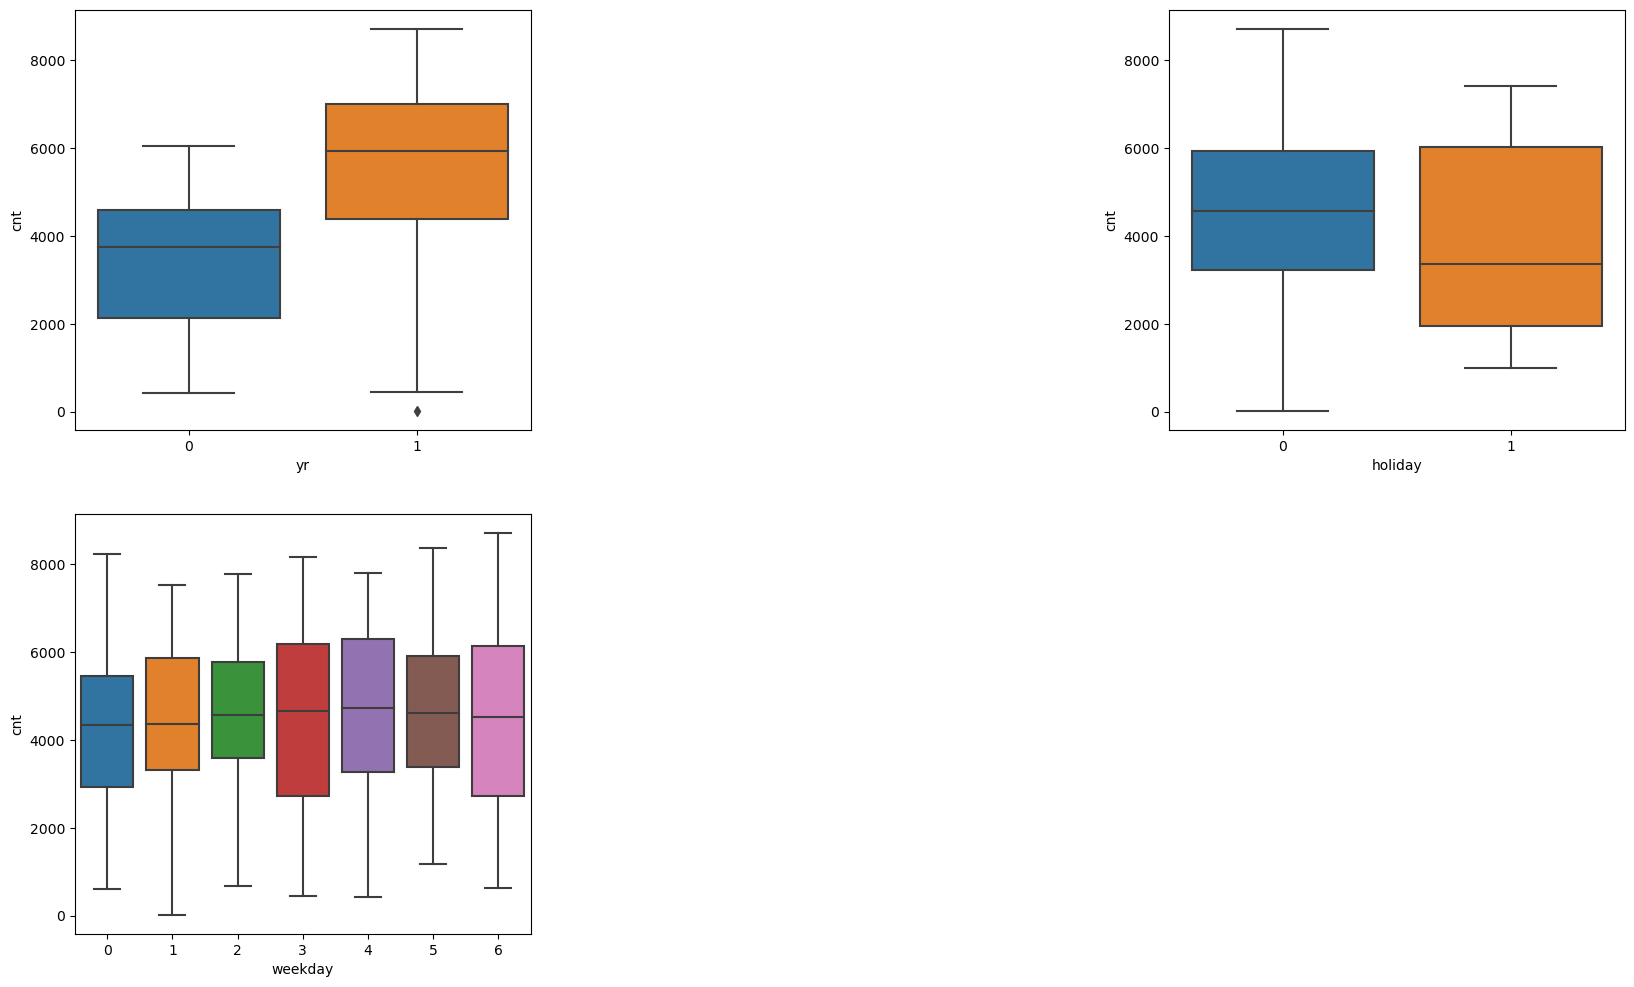

In [392]:
#Visualising categorical variables
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.boxplot(x='yr',y='cnt',data=Boombikes)


plt.subplot(2,3,3)
sns.boxplot(x='holiday',y='cnt',data=Boombikes)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=Boombikes)


plt.show()

In [393]:
df1_train,df1_test = train_test_split(Boombikes, train_size=0.7, random_state=100)

In [394]:
#Rescaling th features
#1 Min MAx Scaling(normalization)
#2 Standardization ( Mean 0 , Sigma 1)
#this time we will us min max scaling

In [395]:
from sklearn.preprocessing import MinMaxScaler
num_vars=['season','weekday','weathersit','temp','windspeed',]
scaler=MinMaxScaler()
df1_train[num_vars] = scaler.fit_transform(df1_train[num_vars])

In [396]:
df1_train.head()

,season,yr,holiday,weekday,weathersit,temp,windspeed,cnt
576,0.666667,1,0,0.333333,0.0,0.815169,0.264686,7216
426,0.000000,1,0,1.000000,0.5,0.442393,0.255342,4066
728,0.000000,1,0,0.000000,0.0,0.245101,0.663106,1796
482,0.333333,1,0,1.000000,0.5,0.395666,0.188475,4220
111,0.333333,0,0,0.833333,0.5,0.345824,0.380981,1683


In [397]:
df1_train.describe()


,season,yr,holiday,weekday,weathersit,temp,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.504575,0.507843,0.025490,0.498366,0.201961,0.537440,0.320883,4485.337255
std,0.370078,0.500429,0.157763,0.336182,0.273944,0.225858,0.169803,1950.666077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,0.333333,0.000000,0.000000,0.166667,0.000000,0.339853,0.199179,3120.000000
50%,0.666667,1.000000,0.000000,0.500000,0.000000,0.542596,0.296763,4530.000000
75%,0.666667,1.000000,0.000000,0.833333,0.500000,0.735215,0.414447,5973.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000


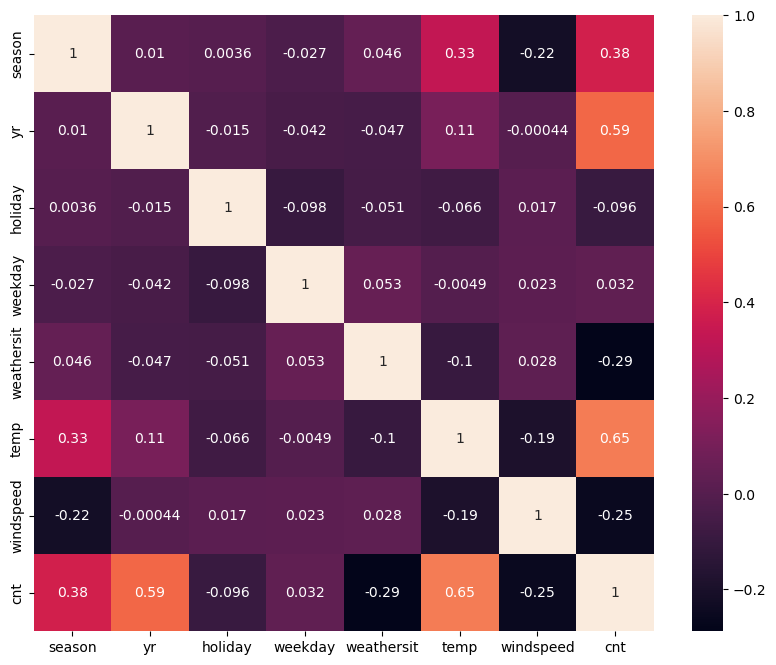

In [398]:
plt.figure(figsize=(10,8))
sns.heatmap(df1_train.corr(),annot=True)
plt.show()

In [399]:
df1_train.head()


,season,yr,holiday,weekday,weathersit,temp,windspeed,cnt
576,0.666667,1,0,0.333333,0.0,0.815169,0.264686,7216
426,0.000000,1,0,1.000000,0.5,0.442393,0.255342,4066
728,0.000000,1,0,0.000000,0.0,0.245101,0.663106,1796
482,0.333333,1,0,1.000000,0.5,0.395666,0.188475,4220
111,0.333333,0,0,0.833333,0.5,0.345824,0.380981,1683


In [400]:
x_train=df1_train.drop(['cnt'],axis=1)
x_train.head()

,season,yr,holiday,weekday,weathersit,temp,windspeed
576,0.666667,1,0,0.333333,0.0,0.815169,0.264686
426,0.000000,1,0,1.000000,0.5,0.442393,0.255342
728,0.000000,1,0,0.000000,0.0,0.245101,0.663106
482,0.333333,1,0,1.000000,0.5,0.395666,0.188475
111,0.333333,0,0,0.833333,0.5,0.345824,0.380981


In [401]:
x_train.head()

,season,yr,holiday,weekday,weathersit,temp,windspeed
576,0.666667,1,0,0.333333,0.0,0.815169,0.264686
426,0.000000,1,0,1.000000,0.5,0.442393,0.255342
728,0.000000,1,0,0.000000,0.0,0.245101,0.663106
482,0.333333,1,0,1.000000,0.5,0.395666,0.188475
111,0.333333,0,0,0.833333,0.5,0.345824,0.380981


In [402]:
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [403]:
x_train.head()

,season,yr,holiday,weekday,weathersit,temp,windspeed
576,0.666667,1,0,0.333333,0.0,0.815169,0.264686
426,0.000000,1,0,1.000000,0.5,0.442393,0.255342
728,0.000000,1,0,0.000000,0.0,0.245101,0.663106
482,0.333333,1,0,1.000000,0.5,0.395666,0.188475
111,0.333333,0,0,0.833333,0.5,0.345824,0.380981


In [404]:
x_train_sm= sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     284.7
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          2.90e-170
Time:                        19:51:24   Log-Likelihood:                -4178.0
No. Observations:                 510   AIC:                             8372.
Df Residuals:                     502   BIC:                             8406.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1255.2621    161.322      7.781      0.000     938.313    1572.212
season      1092.5883    113.917      9.591      0.000     868.776    1316.401
yr          2063.9596     78.660     26.239      0.000    1909.417    2218.502
holiday     -743.4989    249.813     -2.976      0.003   -1234.307    -252.690
weekday      414.0140    117.040      3.537      0.000     184.065     643.963
weathersit -1625.4228    144.353    -11.260      0.000   -1909.033   -1341.813
temp        4075.5018    187.482     21.738      0.000    3707.155    4443.849
windspeed  -1305.2356    237.685     -5.491      0.000   -1772.216    -838.255
==============================================================================
Omnibus:                       59.411   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.908
Skew:                          -0.665   Prob(JB):                     3.37e-27
Kurtosis:                       4.992   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [405]:
lr_model.params

const         1255.262142
season        1092.588274
yr            2063.959556
holiday       -743.498898
weekday        414.013975
weathersit   -1625.422786
temp          4075.501813
windspeed    -1305.235594
dtype: float64

In [406]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ="VIF",ascending = False )
vif

,features,VIF
5,temp,5.33
6,windspeed,3.17
0,season,3.14
3,weekday,2.83
1,yr,1.98
4,weathersit,1.52
2,holiday,1.03


In [407]:
y_train_pred= lr_model.predict(x_train_sm)

In [408]:
y_train_pred.head()

576    7162.362495
426    4390.215796
728    3452.621518
482    4651.254387
111    2063.895412
dtype: float64

In [409]:
res=y_train-y_train_pred

C:\Users\rupesh.kv\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


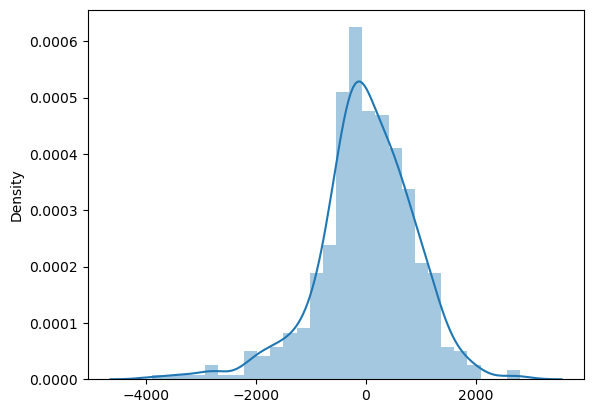

In [410]:
sns.distplot(res)
plt.show()

In [411]:
#Prediction and evaluation for Test data set

In [412]:
num_vars=['season','weekday','weathersit','temp','windspeed',]

df1_test[num_vars] = scaler.transform(df1_test[num_vars])
df1_test.head()

,season,yr,holiday,weekday,weathersit,temp,windspeed,cnt
184,0.666667,0,1,0.166667,0.5,0.831783,0.084219,6043
535,0.333333,1,0,0.500000,0.0,0.901354,0.153728,6211
299,1.000000,0,0,0.666667,0.5,0.511964,0.334206,2659
221,0.666667,0,0,0.500000,0.0,0.881625,0.339570,4780
152,0.333333,0,0,0.666667,0.0,0.817246,0.537414,4968


In [413]:
df1_test.describe()

,season,yr,holiday,weekday,weathersit,temp,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.487879,0.481818,0.036364,0.502273,0.186364,0.558718,0.313293,4560.559091
std,0.370602,0.500809,0.187620,0.330843,0.269102,0.233187,0.159584,1904.968544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,-0.042808,441.000000
25%,0.000000,0.000000,0.000000,0.166667,0.000000,0.355429,0.198843,3312.750000
50%,0.333333,0.000000,0.000000,0.500000,0.000000,0.558172,0.300126,4582.500000
75%,0.666667,1.000000,0.000000,0.833333,0.500000,0.755981,0.402718,5913.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.807474,8395.000000


In [414]:
y_test = df1_test.pop('cnt')
x_test=df1_test

In [415]:
#add Constant

In [416]:
x_test_sm=sm.add_constant(x_test)
x_test_sm

,const,season,yr,holiday,weekday,weathersit,temp,windspeed
184,1.0,0.666667,0,1,0.166667,0.5,0.831783,0.084219
535,1.0,0.333333,1,0,0.500000,0.0,0.901354,0.153728
299,1.0,1.000000,0,0,0.666667,0.5,0.511964,0.334206
221,1.0,0.666667,0,0,0.500000,0.0,0.881625,0.339570
152,1.0,0.333333,0,0,0.666667,0.0,0.817246,0.537414
...,...,...,...,...,...,...,...,...
702,1.0,1.000000,1,0,0.333333,0.0,0.519232,0.283397
127,1.0,0.333333,0,0,0.000000,0.0,0.584649,0.069510
640,1.0,1.000000,1,0,0.500000,0.5,0.745598,0.052115
72,1.0,0.000000,0,0,0.166667,0.0,0.331557,0.203418


In [417]:
#predictions

In [418]:
y_test_pred=lr_model.predict(x_test_sm)

In [419]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7799812920685202